In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Part 1: Data Preprocessing & Visualization

Step1: Load the dataset to a DF. 

In [2]:
df = pd.read_csv('arabica_data_cleaned.csv', header=None)
new_header = df.iloc[0]
df = df[1:-1]
df.columns = new_header

Step2: Select features and target in the data set.

There are 44 columns in the dataframe.Some of columns of for indexing purpose, such as "NaN", "Lot Number". Some coulmns are descriptive feature, such as "Farm name", "Country of Origin", "Company name", which will not be included in the model training process. For convinience purposes, we are selecting those numeric feature, which mainly focuses on the physical property and production conditions of the coffee beans as features of interests. Selected feature include:

(1) Aroma

(2) Flavor

(3) Aftertaste

(4) Acidity 

(5) Body

(6) Balance

(7) Uniformity

(8) Clean.Cup

(9) Sweetness

(10) Cupper.Points

(11) Moisture

(12) Quakers

(13) Category.One.Defects

(14) Category.Two.Defects

(15) altitude_mean_meters

Target feature is "Total.Cup.Points"

Step3: Preprocessing

In [3]:
#remove unnecessary columns
df_clean = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
               'Cupper.Points', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects',
               'altitude_mean_meters', 'Total.Cup.Points']]
df_clean = df_clean.astype(float)

In [4]:
#Remove altitude that apparently out of boundary.
df_clean['altitude_mean_meters'] = df_clean['altitude_mean_meters'].replace(190164, np.nan)
df_clean['altitude_mean_meters'] = df_clean['altitude_mean_meters'].replace(110000, np.nan)
df_clean['altitude_mean_meters'] = df_clean['altitude_mean_meters'].replace(11000, np.nan)

In [5]:
#fill na with average value
altitude_mean_val = df_clean['altitude_mean_meters'].mean()
df_clean['altitude_mean_meters'] = df_clean['altitude_mean_meters'].fillna(altitude_mean_val)
df_clean['Quakers'] = df_clean['Quakers'].fillna(0)

In [6]:
#All the nan fileds have been filled.
df_clean.isnull().sum()

0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Moisture                0
Quakers                 0
Category.One.Defects    0
Category.Two.Defects    0
altitude_mean_meters    0
Total.Cup.Points        0
dtype: int64

In [7]:
#Display the cleaned data frame
df_clean

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Quakers,Category.One.Defects,Category.Two.Defects,altitude_mean_meters,Total.Cup.Points
1,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,0.12,0.0,0.0,0.0,2075.00,90.58
2,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,0.12,0.0,0.0,1.0,2075.00,89.92
3,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,0.00,0.0,0.0,0.0,1700.00,89.75
4,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,0.11,0.0,0.0,2.0,2000.00,89.00
5,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,0.12,0.0,0.0,2.0,2075.00,88.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,7.00,6.33,6.17,6.50,6.67,6.17,8.00,8.00,8.00,6.33,0.10,0.0,0.0,4.0,1450.00,69.17
1307,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,0.11,0.0,0.0,20.0,900.00,68.33
1308,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,0.14,0.0,8.0,16.0,350.00,67.92
1309,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,0.13,0.0,1.0,5.0,1100.00,63.08


Step 4: data description and visualization

In [8]:
col_names = df_clean.columns.tolist()
feature_names = col_names[:-1]
target_name = col_names[-1]
print("Features:\n", feature_names)
print("Target:\n", target_name)

Features:
 ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects', 'altitude_mean_meters']
Target:
 Total.Cup.Points


In [9]:
#Data description
def display_statistics(value, name):
    print('Statistics for ' + name + ':\n ')
    print('MIN(' + name + ')= ' + str(np.amin(value)))  # minimum value in the list
    print('MAX(' + name + ')= ' + str(np.amax(value)))  # maximum value
    print('RANGE(' + name + ')= ' + str(np.ptp(value)))  # the range of the values
    print('MEAN(' + name + ')= ' + str(np.mean(value)))  # the mean of the values
    print('STD(' + name + ')= ' + str(np.std(value, ddof=1)))  # the standard deviation of the values
    print('VARIANCE(' + name + ')= ' + str(np.var(value, ddof=1)))  # the variance of the values
    print('COUNT(' + name + ')= ' + str(value.count()))  # the count of the values
    print('25% PERCENTILES(' + name + ')= ' + str(value.quantile(.25)))  # the 25% percentile of the values
    print('50% PERCENTILES(' + name + ')= ' + str(value.quantile(.5)))  # the 50% percentile of the values
    print('75% PERCENTILES(' + name + ')= ' + str(value.quantile(.75)))  # the 75% percentile of the values
    print('\n\n');


for col_name in col_names:
    display_statistics(df_clean[col_name], col_name)

Statistics for Aroma:
 
MIN(Aroma)= 5.08
MAX(Aroma)= 8.75
RANGE(Aroma)= 3.67
MEAN(Aroma)= 7.569580152671755
STD(Aroma)= 0.3158454393310044
VARIANCE(Aroma)= 0.09975834154619517
COUNT(Aroma)= 1310
25% PERCENTILES(Aroma)= 7.42
50% PERCENTILES(Aroma)= 7.58
75% PERCENTILES(Aroma)= 7.75



Statistics for Flavor:
 
MIN(Flavor)= 6.08
MAX(Flavor)= 8.83
RANGE(Flavor)= 2.75
MEAN(Flavor)= 7.523809160305342
STD(Flavor)= 0.3418970268922596
VARIANCE(Flavor)= 0.1168935769977665
COUNT(Flavor)= 1310
25% PERCENTILES(Flavor)= 7.33
50% PERCENTILES(Flavor)= 7.58
75% PERCENTILES(Flavor)= 7.75



Statistics for Aftertaste:
 
MIN(Aftertaste)= 6.17
MAX(Aftertaste)= 8.67
RANGE(Aftertaste)= 2.5
MEAN(Aftertaste)= 7.403343511450382
STD(Aftertaste)= 0.3498673277080778
VARIANCE(Aftertaste)= 0.12240714699759152
COUNT(Aftertaste)= 1310
25% PERCENTILES(Aftertaste)= 7.25
50% PERCENTILES(Aftertaste)= 7.42
75% PERCENTILES(Aftertaste)= 7.58



Statistics for Acidity:
 
MIN(Acidity)= 5.25
MAX(Acidity)= 8.75
RANGE(Acidity)= 3

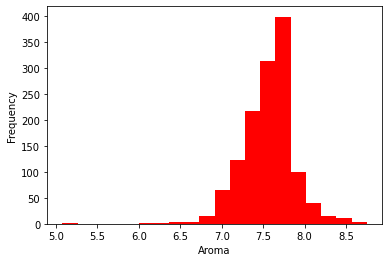

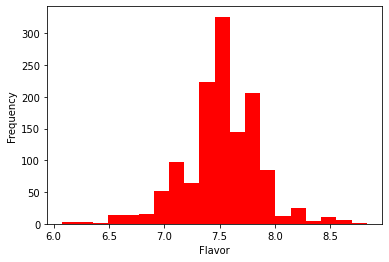

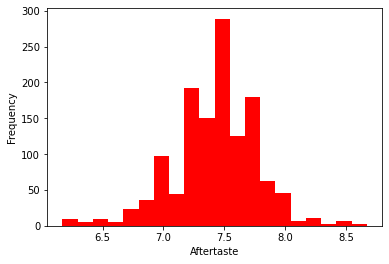

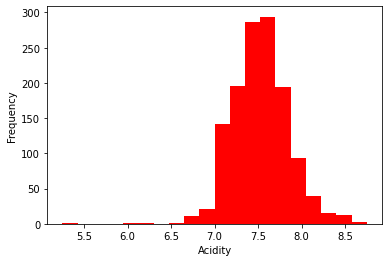

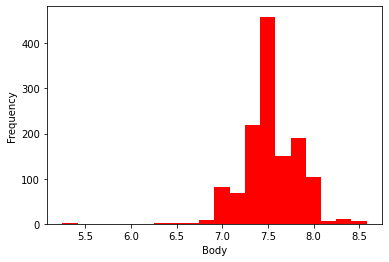

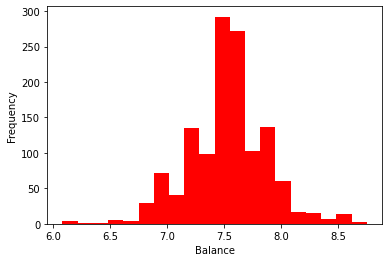

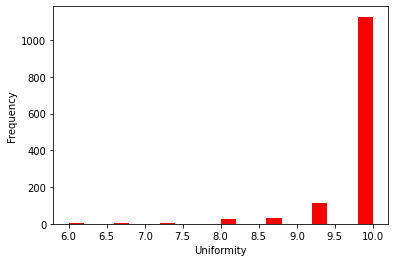

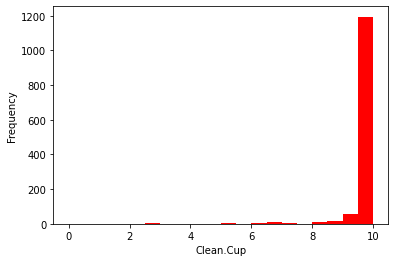

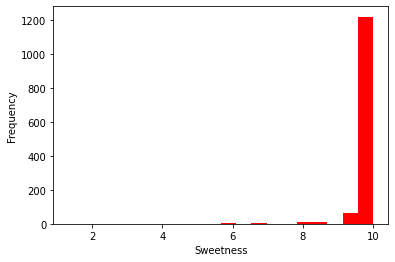

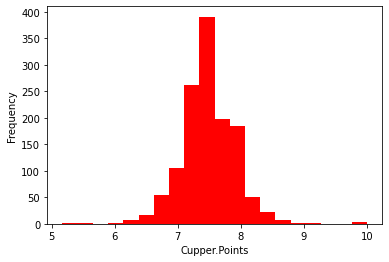

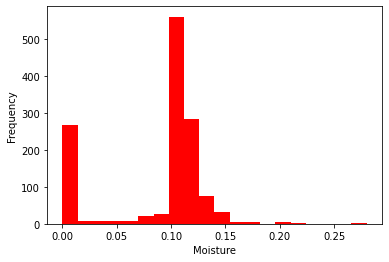

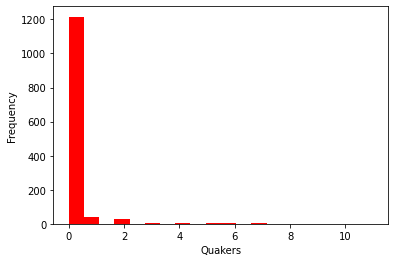

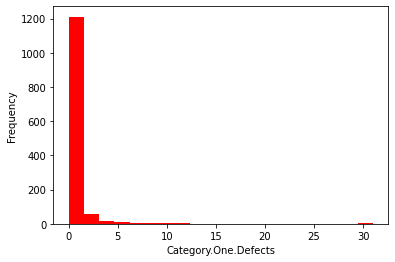

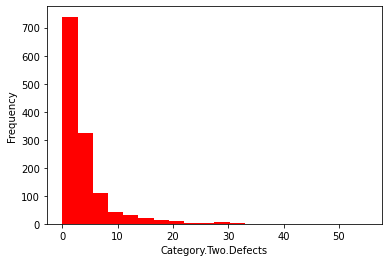

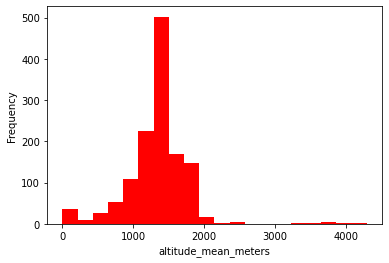

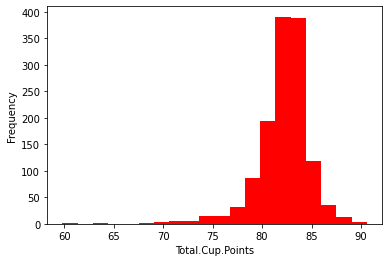

In [10]:
def plot_hist(i):
    fig_new = plt.figure()
    ax_new = fig_new.add_subplot(1, 1, 1)
    n, bins, patches = ax_new.hist(df_clean[col_names[i]], bins=20, color='red')
    ax_new.set_xlabel(col_names[i])
    ax_new.set_ylabel('Frequency')


for i in range(len(col_names)):
    plot_hist(i)



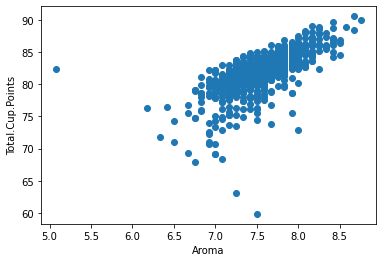

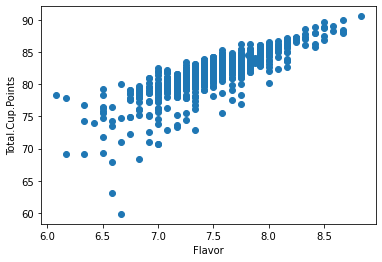

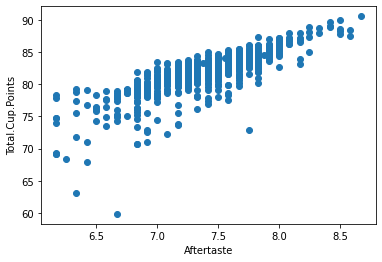

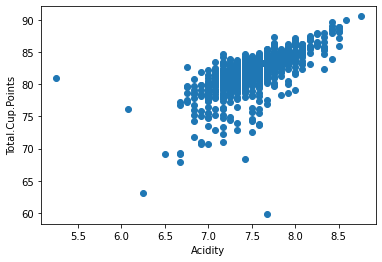

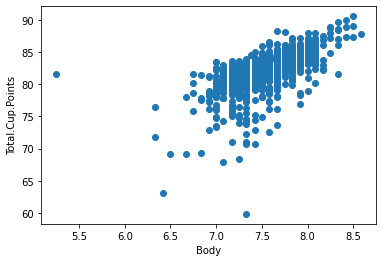

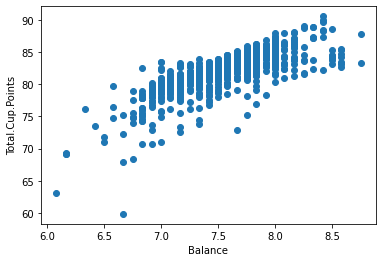

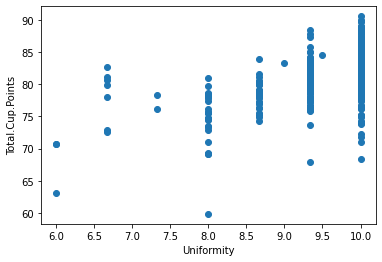

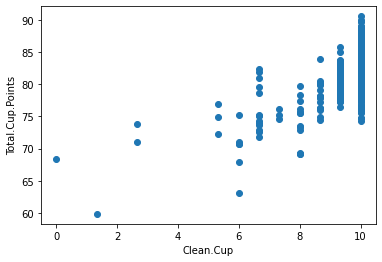

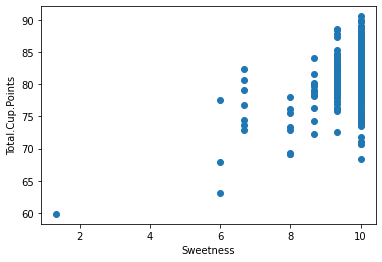

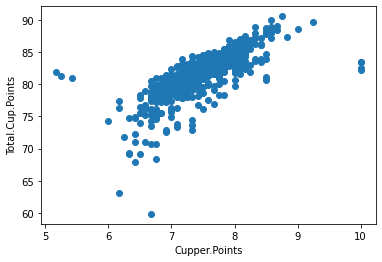

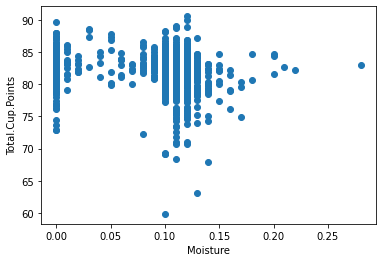

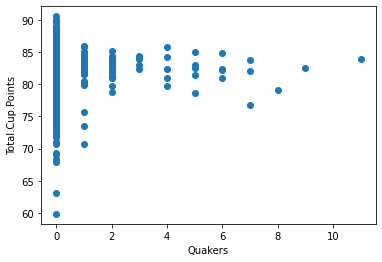

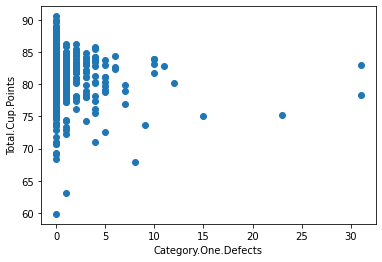

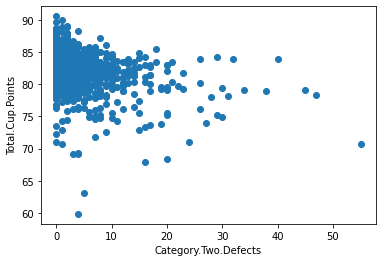

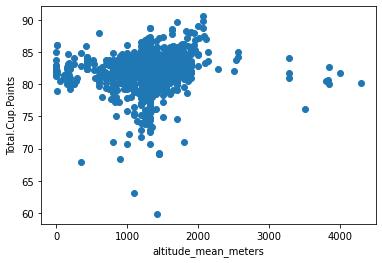

In [11]:
def plot_scatter(i):
    fig_new = plt.figure()
    ax_new = fig_new.add_subplot(1, 1, 1)
    ax_new.scatter(df_clean[col_names[i]], df_clean[target_name])
    ax_new.set_xlabel(col_names[i])
    ax_new.set_ylabel(target_name)


for i in range(len(col_names) - 1):
    plot_scatter(i)


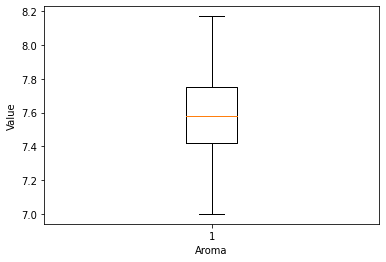

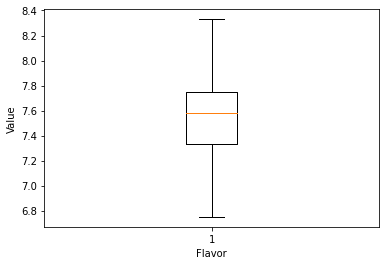

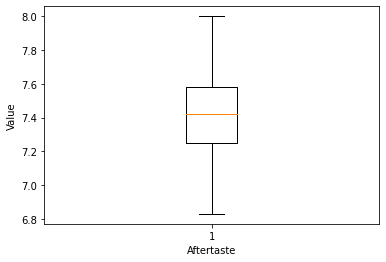

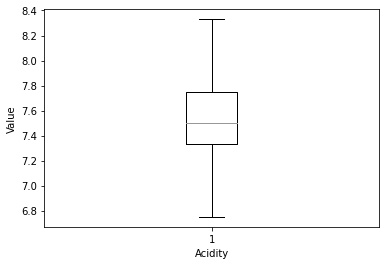

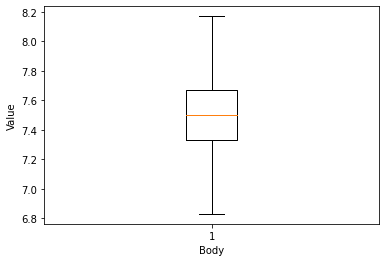

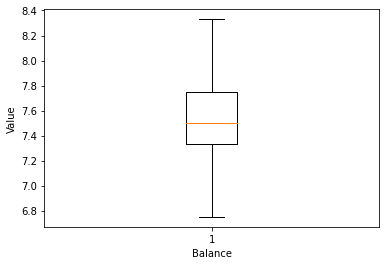

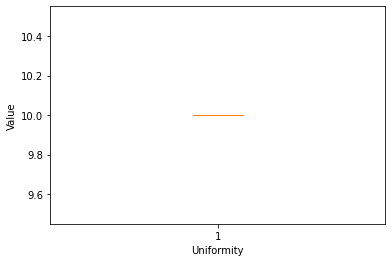

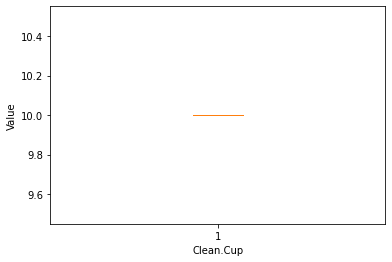

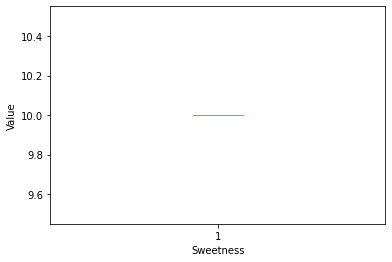

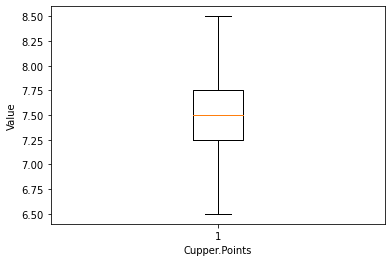

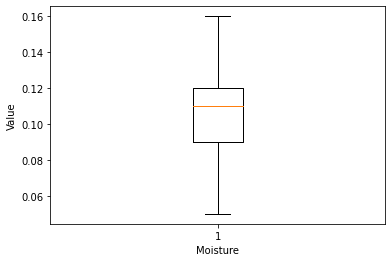

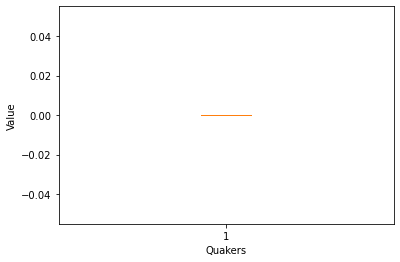

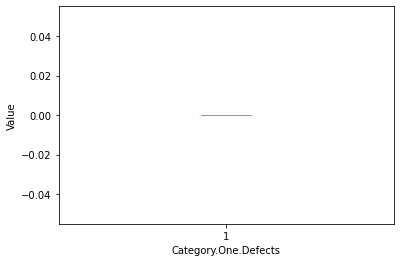

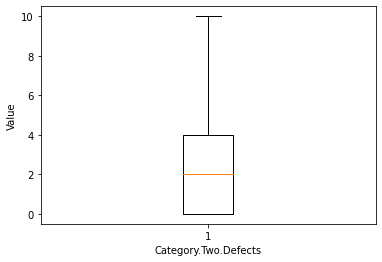

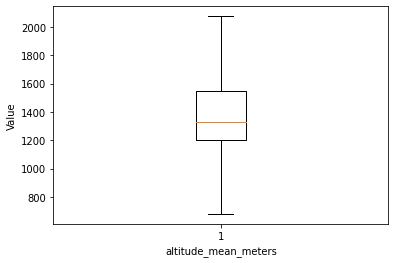

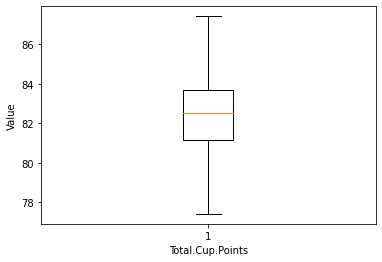

In [12]:
def plot_box(i):
    fig_new = plt.figure()
    ax_new = fig_new.add_subplot(1, 1, 1)
    ax_new.boxplot(df_clean[col_names[i]], showfliers=False)
    ax_new.set_xlabel(col_names[i])
    ax_new.set_ylabel('Value')


for i in range(len(col_names)):
    plot_box(i)

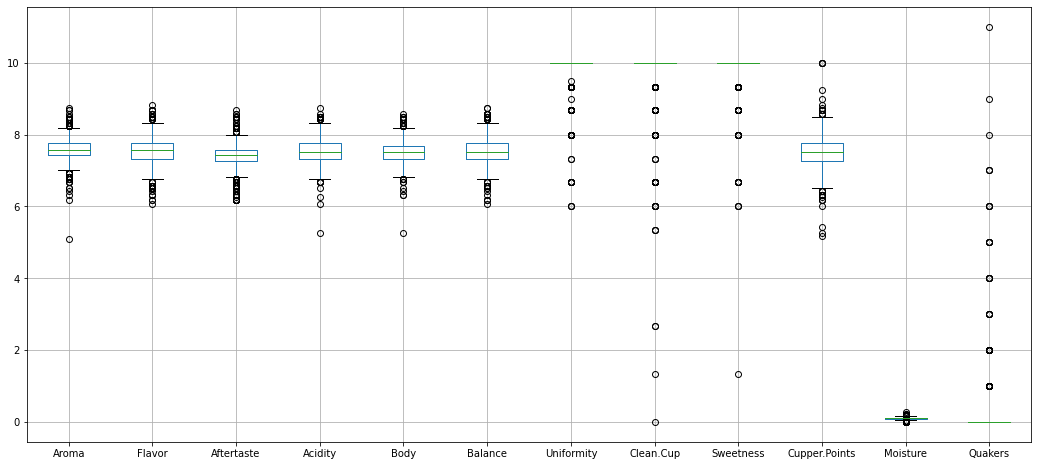

In [13]:
boxplot = df_clean.boxplot(column=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Quakers'], showfliers=True, figsize = (18, 8))


# Part 2: Prediction Models – Train, Evaluate, Improve

## Second Model: Logistic Regression

By using logistic regression, we will need to use categorical target. Hence we label coffee above avg score as 1 and lower or equal to as 0.

In [14]:
x = pd.get_dummies(df_clean.drop(target_name, axis=1))
y = df_clean[target_name]
avg_y = y.mean()
binary_y = []
for i in y:
    if(i <= avg_y):
        binary_y.append(0)
    else:
        binary_y.append(1)
        
binary_y = np.array(binary_y)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, binary_y, test_size=0.20, random_state=41)

In [17]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Here we evaluate our model with confusion matrix, which is the number of correct and incorrect predictions summed up class-wise.

In [18]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 84,  23],
       [ 15, 140]])

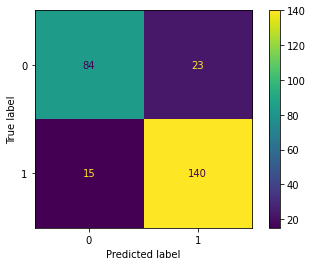

In [19]:
metrics.plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       107
           1       0.86      0.90      0.88       155

    accuracy                           0.85       262
   macro avg       0.85      0.84      0.85       262
weighted avg       0.85      0.85      0.85       262



In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is", mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error is", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error is", mae)

Mean Squared Error is 0.1450381679389313
Root Mean Squared Error is 0.38083876895469987
Mean Absolute Error is 0.1450381679389313


Next, we use each feature alone to create logistic regression model.

Using Aroma alone
Mean Squared Error is 0.23282442748091603
Root Mean Squared Error is 0.4825188364001099
Mean Absolute Error is 0.23282442748091603
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       107
           1       0.84      0.75      0.79       155

    accuracy                           0.77       262
   macro avg       0.76      0.77      0.76       262
weighted avg       0.78      0.77      0.77       262



<Figure size 432x288 with 0 Axes>

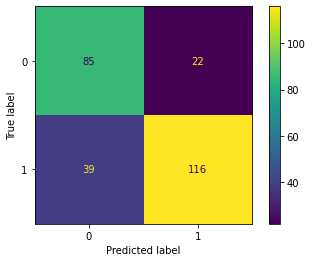

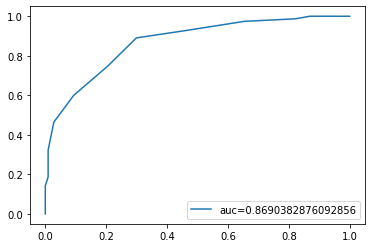

Using Flavor alone
Mean Squared Error is 0.1297709923664122
Root Mean Squared Error is 0.36023741111440966
Mean Absolute Error is 0.1297709923664122
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       107
           1       0.87      0.92      0.89       155

    accuracy                           0.87       262
   macro avg       0.87      0.86      0.86       262
weighted avg       0.87      0.87      0.87       262



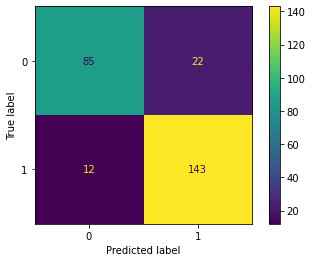

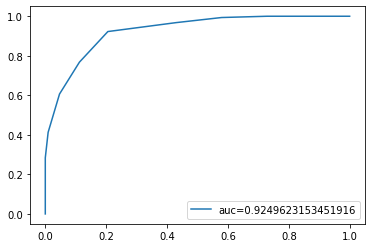

Using Aftertaste alone
Mean Squared Error is 0.183206106870229
Root Mean Squared Error is 0.428025825003853
Mean Absolute Error is 0.183206106870229
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       107
           1       0.87      0.81      0.84       155

    accuracy                           0.82       262
   macro avg       0.81      0.82      0.81       262
weighted avg       0.82      0.82      0.82       262



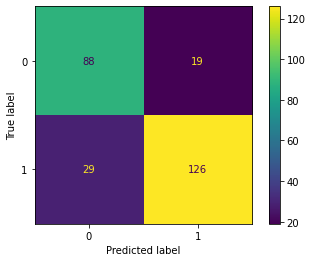

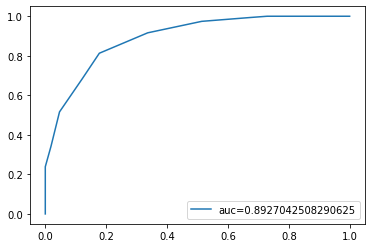

Using Acidity alone
Mean Squared Error is 0.2099236641221374
Root Mean Squared Error is 0.458174272654126
Mean Absolute Error is 0.2099236641221374
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       107
           1       0.80      0.85      0.83       155

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262



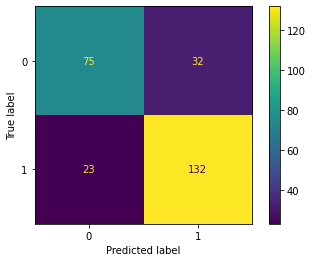

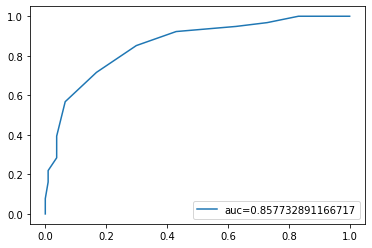

Using Body alone
Mean Squared Error is 0.22900763358778625
Root Mean Squared Error is 0.47854742041702225
Mean Absolute Error is 0.22900763358778625
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       107
           1       0.81      0.79      0.80       155

    accuracy                           0.77       262
   macro avg       0.76      0.77      0.76       262
weighted avg       0.77      0.77      0.77       262



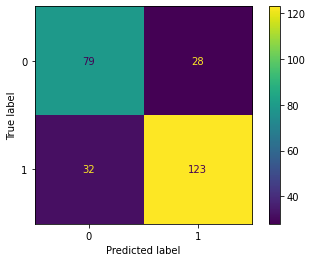

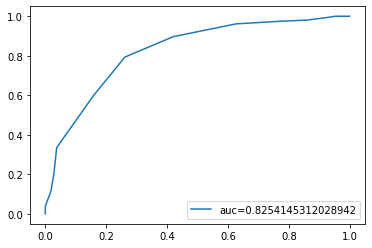

Using Balance alone
Mean Squared Error is 0.14885496183206107
Root Mean Squared Error is 0.3858172648185421
Mean Absolute Error is 0.14885496183206107
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       107
           1       0.88      0.87      0.87       155

    accuracy                           0.85       262
   macro avg       0.85      0.85      0.85       262
weighted avg       0.85      0.85      0.85       262



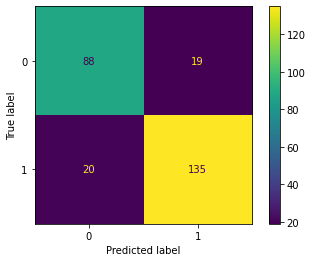

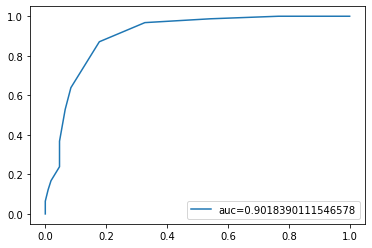

Using Uniformity alone
Mean Squared Error is 0.3435114503816794
Root Mean Squared Error is 0.5860984988734227
Mean Absolute Error is 0.3435114503816794
              precision    recall  f1-score   support

           0       0.74      0.24      0.37       107
           1       0.64      0.94      0.76       155

    accuracy                           0.66       262
   macro avg       0.69      0.59      0.57       262
weighted avg       0.68      0.66      0.60       262



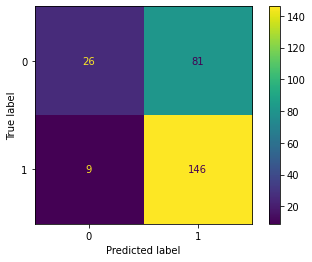

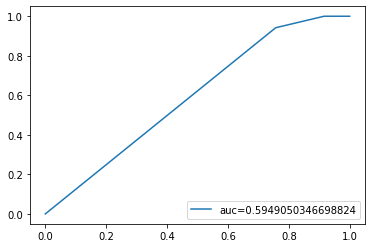

Using Clean.Cup alone
Mean Squared Error is 0.3511450381679389
Root Mean Squared Error is 0.5925749219870335
Mean Absolute Error is 0.3511450381679389
              precision    recall  f1-score   support

           0       0.83      0.18      0.29       107
           1       0.63      0.97      0.77       155

    accuracy                           0.65       262
   macro avg       0.73      0.58      0.53       262
weighted avg       0.71      0.65      0.57       262



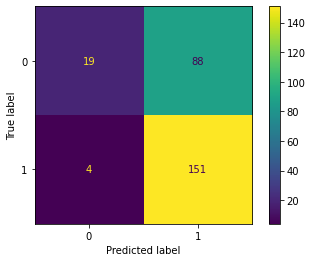

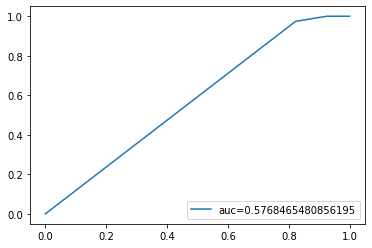

Using Sweetness alone
Mean Squared Error is 0.37404580152671757
Root Mean Squared Error is 0.6115928396627266
Mean Absolute Error is 0.37404580152671757
              precision    recall  f1-score   support

           0       0.80      0.11      0.20       107
           1       0.62      0.98      0.76       155

    accuracy                           0.63       262
   macro avg       0.71      0.55      0.48       262
weighted avg       0.69      0.63      0.53       262



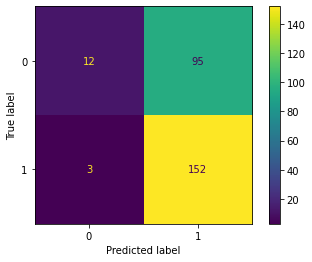

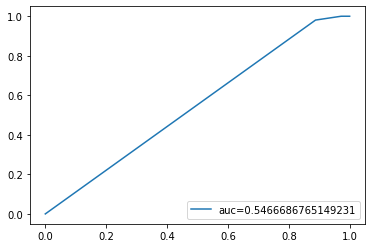

Using Cupper.Points alone
Mean Squared Error is 0.16793893129770993
Root Mean Squared Error is 0.4098035276784595
Mean Absolute Error is 0.16793893129770993
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       107
           1       0.89      0.81      0.85       155

    accuracy                           0.83       262
   macro avg       0.83      0.84      0.83       262
weighted avg       0.84      0.83      0.83       262



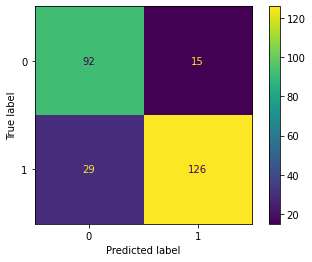

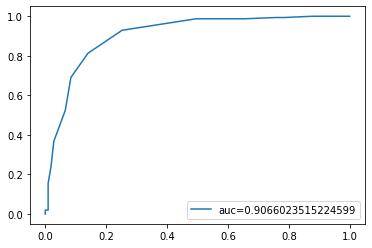

Using Moisture alone
Mean Squared Error is 0.4083969465648855
Root Mean Squared Error is 0.6390594233440936
Mean Absolute Error is 0.4083969465648855
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.59      1.00      0.74       155

    accuracy                           0.59       262
   macro avg       0.30      0.50      0.37       262
weighted avg       0.35      0.59      0.44       262



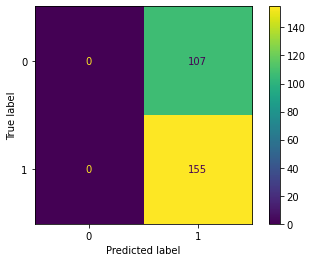

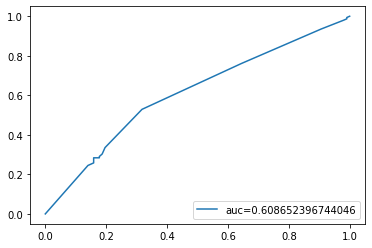

Using Quakers alone
Mean Squared Error is 0.4083969465648855
Root Mean Squared Error is 0.6390594233440936
Mean Absolute Error is 0.4083969465648855
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.59      1.00      0.74       155

    accuracy                           0.59       262
   macro avg       0.30      0.50      0.37       262
weighted avg       0.35      0.59      0.44       262



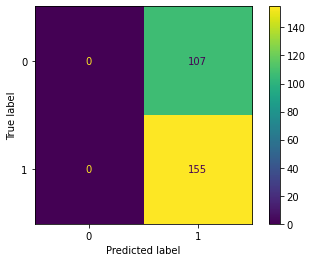

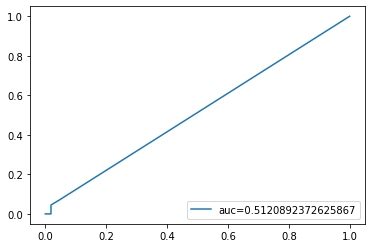

Using Category.One.Defects alone
Mean Squared Error is 0.40076335877862596
Root Mean Squared Error is 0.6330587324874573
Mean Absolute Error is 0.40076335877862596
              precision    recall  f1-score   support

           0       0.58      0.07      0.12       107
           1       0.60      0.97      0.74       155

    accuracy                           0.60       262
   macro avg       0.59      0.52      0.43       262
weighted avg       0.59      0.60      0.49       262



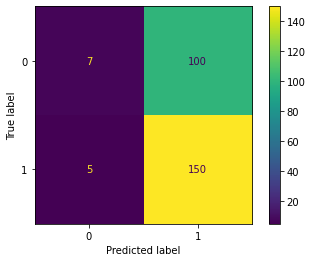

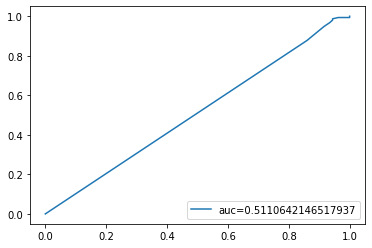

Using Category.Two.Defects alone
Mean Squared Error is 0.4083969465648855
Root Mean Squared Error is 0.6390594233440936
Mean Absolute Error is 0.4083969465648855
              precision    recall  f1-score   support

           0       0.50      0.16      0.24       107
           1       0.61      0.89      0.72       155

    accuracy                           0.59       262
   macro avg       0.55      0.52      0.48       262
weighted avg       0.56      0.59      0.52       262



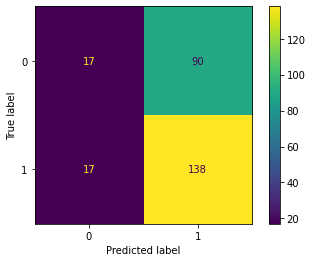

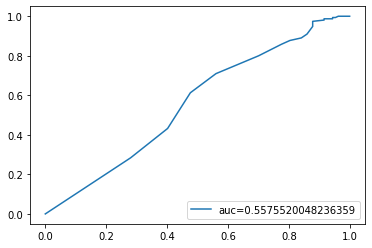

Using altitude_mean_meters alone
Mean Squared Error is 0.4083969465648855
Root Mean Squared Error is 0.6390594233440936
Mean Absolute Error is 0.4083969465648855
              precision    recall  f1-score   support

           0       0.50      0.10      0.17       107
           1       0.60      0.93      0.73       155

    accuracy                           0.59       262
   macro avg       0.55      0.52      0.45       262
weighted avg       0.56      0.59      0.50       262



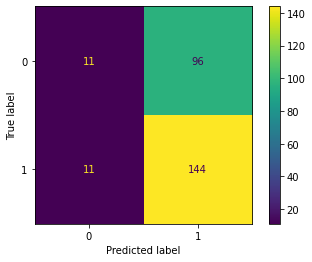

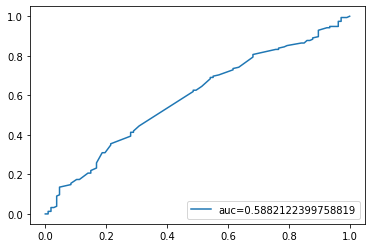

In [22]:
from scipy.special import expit
plt.figure()
for i in range(len(col_names) - 1):
    df = pd.DataFrame(df_clean[col_names[i]])
    x_train, x_test, y_train, y_test = train_test_split(df, binary_y, test_size=0.20, random_state=41)

    clf = LogisticRegression(random_state=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(f"Using {col_names[i]} alone")
    metrics.plot_confusion_matrix(clf, x_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error is", mse)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error is", rmse)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error is", mae)
    
    print(metrics.classification_report(y_test, y_pred))
    plt.show()
    
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

## Third Model: Decision Tree Regression

Step 1: Split the dataset into training set and test set (80, 20).

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
import graphviz

In [24]:
# Select data:
x = pd.get_dummies(df_clean.drop(target_name, axis=1))
y = df_clean[target_name]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print("The number of x_train samples: ", len(x_train))
print("The number of x_test samples: ", len(x_test))
print("The number of y_train samples: ", len(y_train))
print("The number of y_test samples: ", len(y_test))

The number of x_train samples:  1048
The number of x_test samples:  262
The number of y_train samples:  1048
The number of y_test samples:  262


Step 2: Using scikit-learn’s DecisionTreeRegressor, train a supervised learning model that can be used to generate predictions for our data.

In [26]:
dtr_model = DecisionTreeRegressor(random_state=0, max_depth=4)
dtr_model.fit(x_train, y_train)
dtr_predict = dtr_model.predict(x_test)

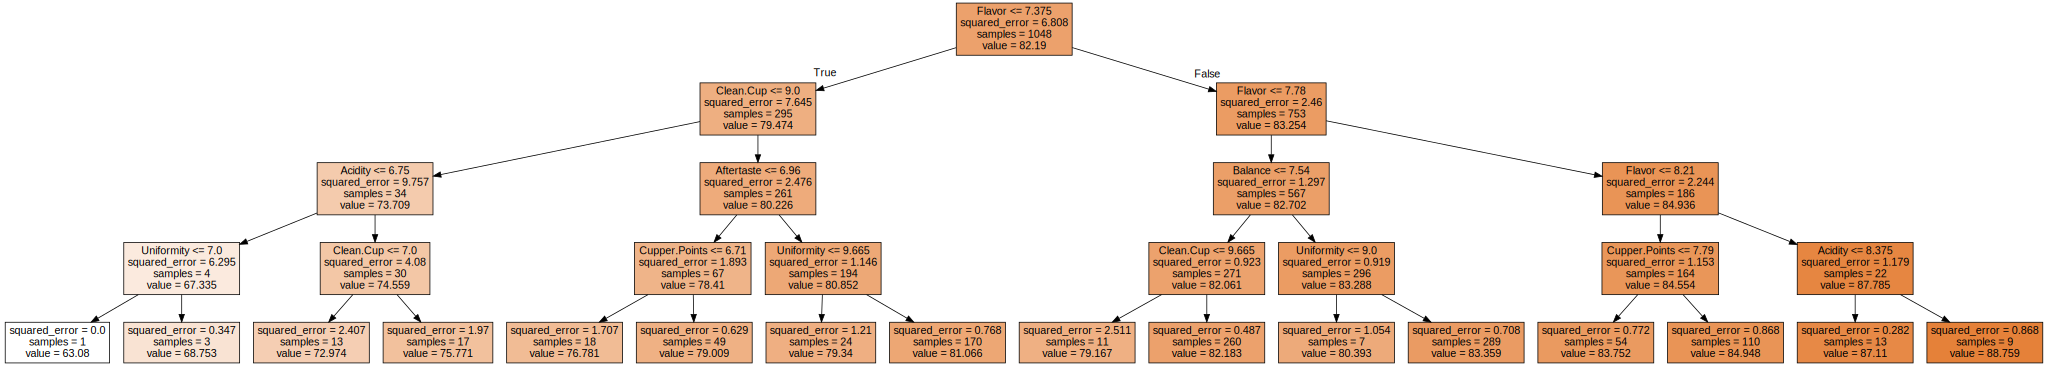

In [27]:
dot_data = tree.export_graphviz(dtr_model, feature_names=list(x), class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)

In [28]:
print('The score of training set: {:.4f}'.format(dtr_model.score(x_train, y_train)))
print('The score of test set: {:.4f}'.format(dtr_model.score(x_test, y_test)))

The score of training set: 0.8876
The score of test set: 0.8120


Step 3: Compare the original values and predicted values.

In [29]:
# Compare by a table:
df_dtr = pd.DataFrame({'Original Values': y_test.values.reshape(-1), 'Predicted Values': dtr_predict.reshape(-1)})
df_dtr

,Original Values,Predicted Values
0,79.83,81.065941
1,82.92,82.183231
2,83.17,83.358581
3,79.75,81.065941
4,83.42,83.751852
...,...,...
257,82.25,81.065941
258,80.67,82.183231
259,83.25,83.358581
260,82.92,81.065941


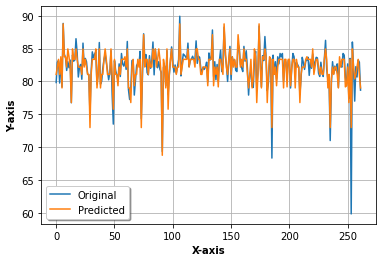

In [30]:
# Compare by a graph:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, dtr_predict, label="Predicted")
plt.xlabel('X-axis', fontweight='bold')
plt.ylabel('Y-axis', fontweight='bold')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)

plt.show()

Step 4: Calculate Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for this Decision Tree Regression model.

In [31]:
mse = mean_squared_error(y_test, dtr_predict)
print("Mean Squared Error is", mse)

rmse = np.sqrt(mean_squared_error(y_test, dtr_predict))
print("Root Mean Squared Error is", rmse)

mae = mean_absolute_error(y_test, dtr_predict)
print("Mean Absolute Error is", mae)

Mean Squared Error is 1.6564856276972133
Root Mean Squared Error is 1.2870453091081189
Mean Absolute Error is 0.8021631760222756


Step 5: Summarize feature importance.

List feature importance scores for each feature:
Feature Aroma has a score of 0.00000
Feature Flavor has a score of 0.62041
Feature Aftertaste has a score of 0.04691
Feature Acidity has a score of 0.03136
Feature Body has a score of 0.00000
Feature Balance has a score of 0.03367
Feature Uniformity has a score of 0.02319
Feature Clean.Cup has a score of 0.22597
Feature Sweetness has a score of 0.00000
Feature Cupper.Points has a score of 0.01850
Feature Moisture has a score of 0.00000
Feature Quakers has a score of 0.00000
Feature Category.One.Defects has a score of 0.00000
Feature Category.Two.Defects has a score of 0.00000
Feature altitude_mean_meters has a score of 0.00000


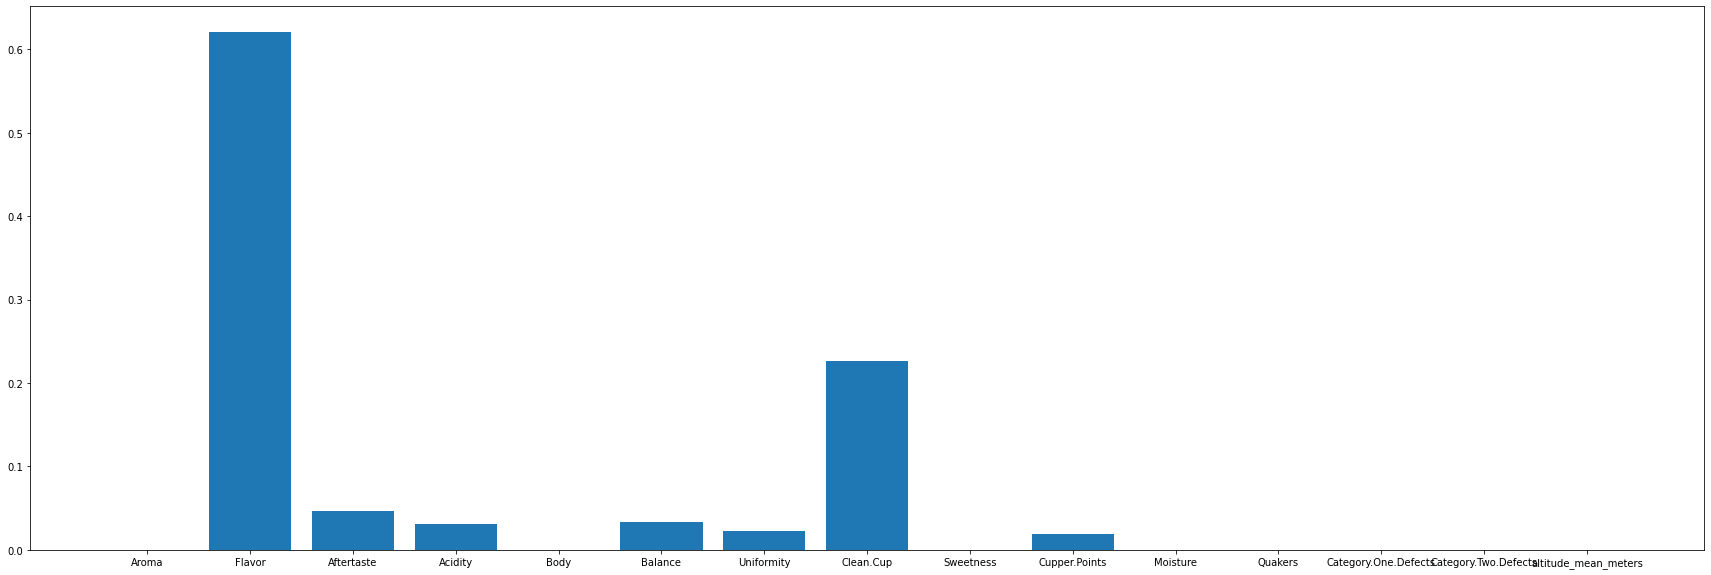

In [32]:
importance = dtr_model.feature_importances_

print("List feature importance scores for each feature:")
for i, v in enumerate(importance):
    print('Feature %s has a score of %.5f' % (col_names[i], v))

# Plot the feature importance:
plt.bar([col_names[i] for i in range(len(importance))], importance)
plt.gcf().set_size_inches(30, 10)
plt.show()

Step 6: Visualise the Decision Tree Regression results.

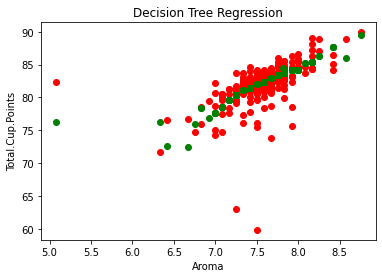

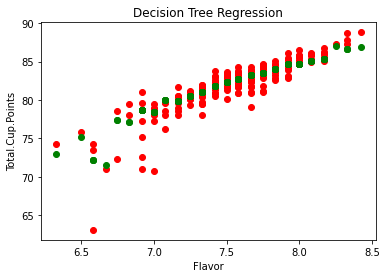

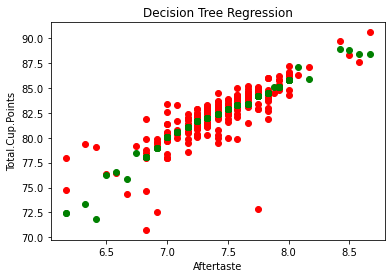

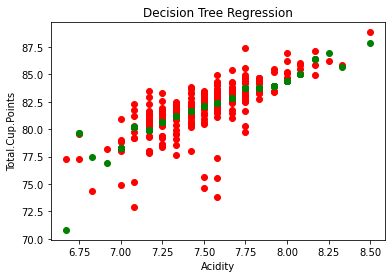

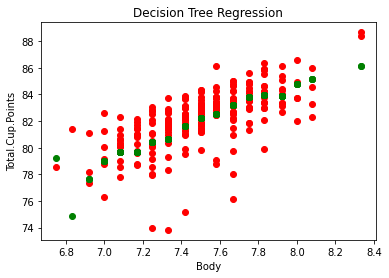

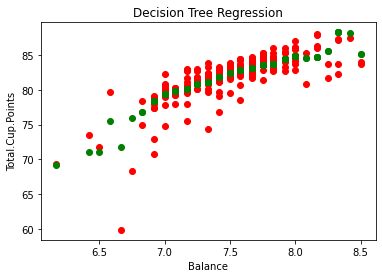

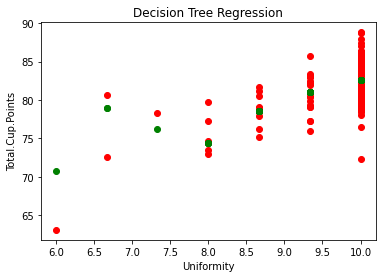

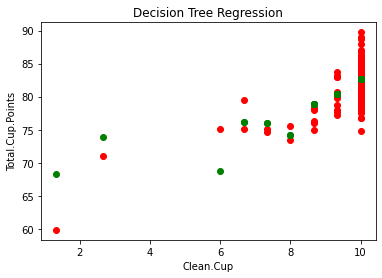

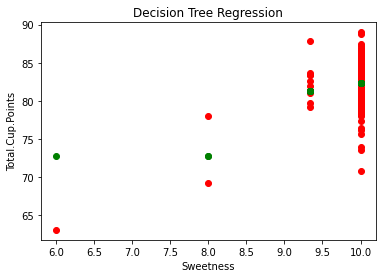

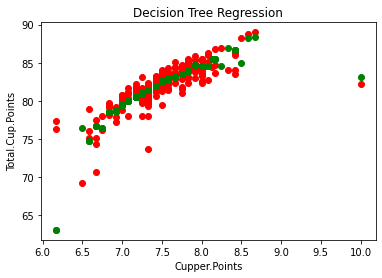

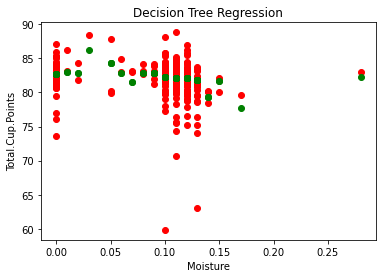

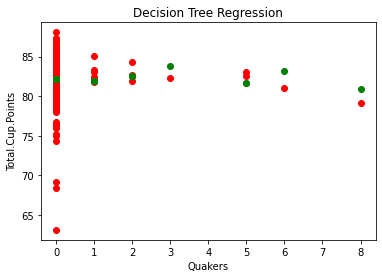

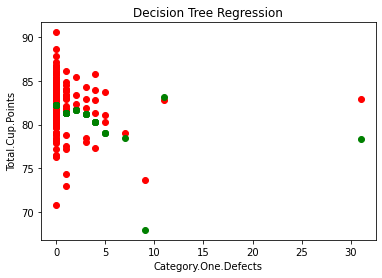

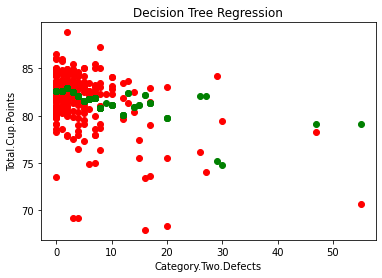

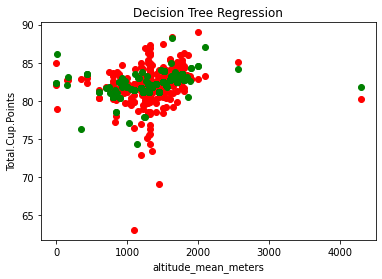

In [33]:
plt.figure()
for i in range(len(col_names) - 1):
    df = pd.DataFrame(df_clean[col_names[i]])
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

    dtr_model = DecisionTreeRegressor(random_state=0)
    dtr_model.fit(x_train, y_train)
    dtr_predict = dtr_model.predict(x_test)

    plt.scatter(x_test, y_test, color='red')
    plt.scatter(x_test, dtr_predict, color='green')
    plt.title('Decision Tree Regression')
    plt.xlabel(col_names[i])
    plt.ylabel(target_name)
    plt.show()

Step 7: Use each feature alone to fit the Decision Tree Regression model on the training set and plot the Decision Tree Regression models generated on each feature.

Mean Squared Error of Feature Aroma is 6.83700


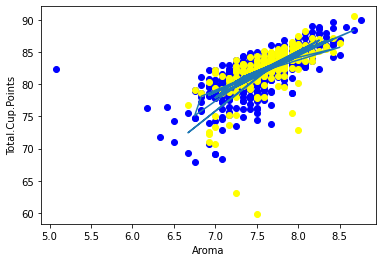

Mean Squared Error of Feature Flavor is 2.46959


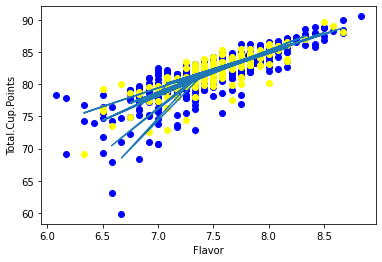

Mean Squared Error of Feature Aftertaste is 2.11643


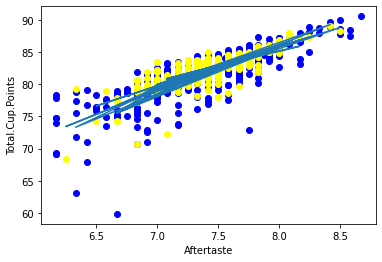

Mean Squared Error of Feature Acidity is 3.23089


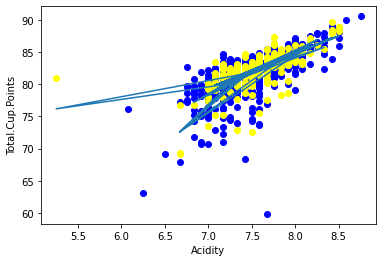

Mean Squared Error of Feature Body is 4.17841


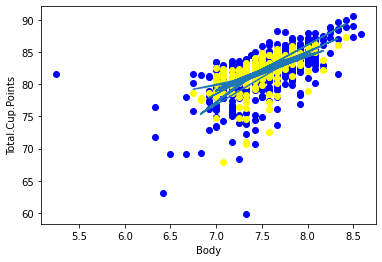

Mean Squared Error of Feature Balance is 3.00726


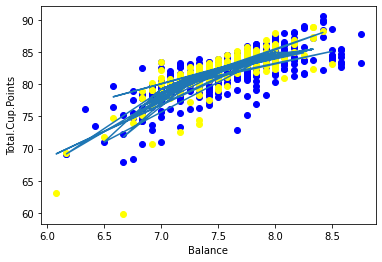

Mean Squared Error of Feature Uniformity is 5.87299


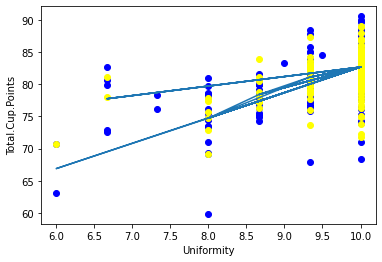

Mean Squared Error of Feature Clean.Cup is 4.37981


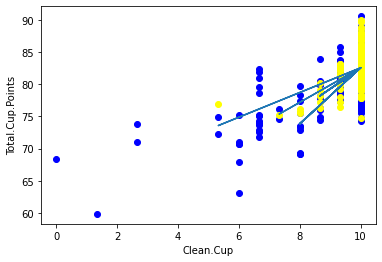

Mean Squared Error of Feature Sweetness is 5.93369


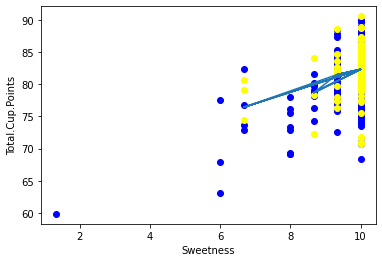

Mean Squared Error of Feature Cupper.Points is 1.99327


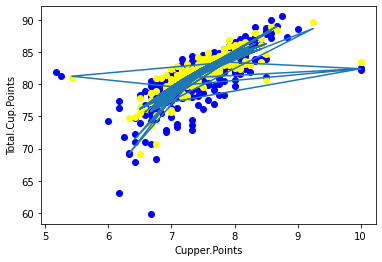

Mean Squared Error of Feature Moisture is 11.11140


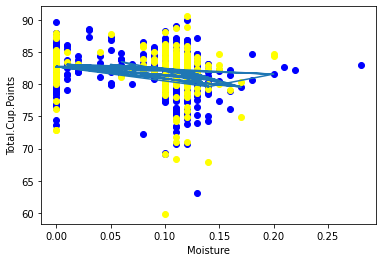

Mean Squared Error of Feature Quakers is 4.82715


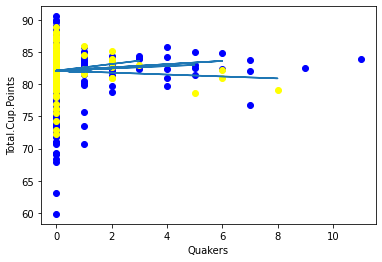

Mean Squared Error of Feature Category.One.Defects is 7.47075


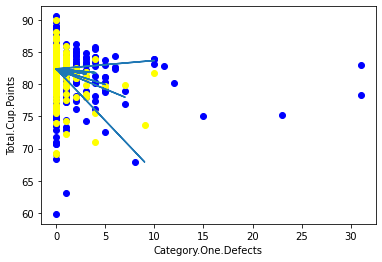

Mean Squared Error of Feature Category.Two.Defects is 6.88354


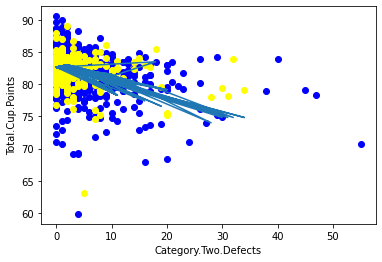

Mean Squared Error of Feature altitude_mean_meters is 10.10551


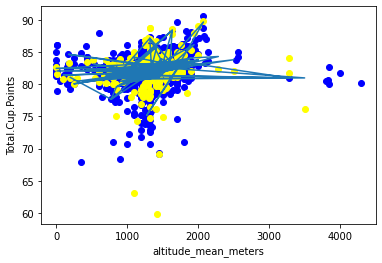

In [34]:
plt.figure()
for i in range(len(col_names) - 1):
    df = pd.DataFrame(df_clean[col_names[i]])
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

    dtr_model = DecisionTreeRegressor(random_state=0)
    dtr_model.fit(x_train, y_train)
    dtr_predict = dtr_model.predict(x_test)

    mse = mean_squared_error(y_test, dtr_predict)
    print('Mean Squared Error of Feature %s is %.5f' % (col_names[i], mse))

    plt.scatter(x_train, y_train, label='Training points', c='blue')
    plt.scatter(x_test, y_test, label='Test points', c='yellow')
    plt.plot(x_test.values.reshape(-1, 1), dtr_predict, label='Decision Tree Regression line')
    plt.xlabel(col_names[i])
    plt.ylabel(target_name)
    plt.show()

## Forth model: Decisison Tree Classification

This section will use tree depths as the knob to do analysis. The first parts has no limits of tree depth, and the second part limit tree depths with 1. The last part with put results from part 1 and 2 together, and do a comparison.

### Dataset preparation.
 Load cleaned dataset, split the dataset to two parts, and convert to bianry numbers (0 and 1).

In [35]:
# Select data and load the module:
from sklearn.tree import DecisionTreeClassifier

x = pd.get_dummies(df_clean.drop(target_name, axis=1))
y = df_clean[target_name]

In [36]:
X = x.to_numpy()

In [37]:
y = list(y) 
print(len(y), " ", min(y), " ", max(y))

for i in range(len(y)):
    if(i <= len(y)/2):
        y[i]=0
    else:
        y[i]=1
        
def split_in_2(y):
    if y == 0:
        return 0
    else:
        return 1

y2 = map(split_in_2,y)

1310   59.83   90.58


### Part I: Consider all features for analysis, with no limits on tree depths.

Split dataset to test set and training set. For each feature, get the tree depth, number of leaves, feature importance, train score, and test score of the tree. Let the tree depth to be Td.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [39]:
# reference: https://www.datacamp.com/tutorial/decision-tree-classification-python
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Td = clf.get_depth()
number_of_leaves= clf.get_n_leaves()
feature_importance= clf.feature_importances_
train_score= clf.score(X_train, y_train)
test_score= clf.score(X_test, y_test)

print('Tree depth: ', Td, '\nnumber of leaves:', number_of_leaves, '\nfeature importance: ', feature_importance, '\ntrain score: ', train_score, '\ntest score: ',test_score)

Tree depth:  13 
number of leaves: 78 
feature importance:  [0.0638186  0.04021338 0.08347377 0.05467195 0.05897188 0.02824249
 0.03800902 0.02224322 0.01253915 0.55200583 0.00811301 0.00658584
 0.         0.01207111 0.01904075] 
train score:  1.0 
test score:  0.9083969465648855


In [40]:
max_score = -1;
max_ndx = -1;
for i in range(len(feature_importance)):
    if(feature_importance[i] > max_score):
        max_ndx = i
        max_score = feature_importance[i]

print('The feature with maximum importance score is ' + col_names[max_ndx])

The feature with maximum importance score is Cupper.Points


### Part II: Consider all features for analysis, with tree depth = 1.

In [41]:
# Create Decision Tree classifer object
clf_1 = DecisionTreeClassifier(max_depth = 1)

# Train Decision Tree Classifer
clf_1 = clf_1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_1 = clf_1.predict(X_test)
    
# stats
Td = clf_1.get_depth()
number_of_leaves= clf_1.get_n_leaves()
feature_importance= clf_1.feature_importances_
train_score= clf_1.score(X_train, y_train)
test_score= clf_1.score(X_test, y_test)
print('Tree depth: ', Td, '\nnumber of leaves:', number_of_leaves, '\nfeature importance: ', feature_importance, '\ntrain score: ', train_score, '\ntest score: ',test_score)


Tree depth:  1 
number of leaves: 2 
feature importance:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
train score:  0.857824427480916 
test score:  0.8664122137404581


In [42]:
max_score = -1;
max_ndx = -1;
for i in range(len(feature_importance)):
    if(feature_importance[i] > max_score):
        max_ndx = i
        max_score = feature_importance[i]

print('The feature with maximum importance score is ' + col_names[max_ndx])

The feature with maximum importance score is Cupper.Points


### Part III: Anaylze the mertics

1) Accuracy

In [43]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


print("Accuracy of model with no depth limit %.2f" % (metrics.accuracy_score(y_test, y_pred)))
print("Accuracy of model with depth 1 is %.2f" % (metrics.accuracy_score(y_test, y_pred_1)))

Accuracy of model with no depth limit 0.91
Accuracy of model with depth 1 is 0.87


Ran two rounds modeling, and the model with no depth limit has higher accuracy.

    2. The precision and recall values

In [44]:
from sklearn.metrics import precision_recall_fscore_support
# Model with depth = no_limit
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9083916083916084, 0.9083916083916084, 0.9083916083916084, None)

In [45]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.9083969465648855, 0.9083969465648855, 0.9083969465648855, None)

In [46]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9083969465648855, 0.9083969465648855, 0.9083969465648855, None)

In [47]:
# Model with depth = 1
precision_recall_fscore_support(y_test, y_pred_1, average='macro')

(0.8682668073383741, 0.8661421911421912, 0.8661763203595874, None)

In [48]:
precision_recall_fscore_support(y_test, y_pred_1, average='micro')

(0.8664122137404581, 0.8664122137404581, 0.8664122137404581, None)

In [49]:
precision_recall_fscore_support(y_test, y_pred_1, average='weighted')

(0.8680813479785825, 0.8664122137404581, 0.8662192100652001, None)

The model without depth limit has higher f-1 score compared with the model with depth = 1.

    3. The classification report

In [50]:
from sklearn.metrics import classification_report
# model with depth = no limit
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       132
           1       0.91      0.91      0.91       130

    accuracy                           0.91       262
   macro avg       0.91      0.91      0.91       262
weighted avg       0.91      0.91      0.91       262



In [51]:
# model with depth = 1
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       132
           1       0.89      0.83      0.86       130

    accuracy                           0.87       262
   macro avg       0.87      0.87      0.87       262
weighted avg       0.87      0.87      0.87       262



The model without depth limit has higher accurancy on precision, recall values and f1-score compared with the model with depth = 1.

    4. The confusion matrix for this experiment

In [52]:
from sklearn.metrics import confusion_matrix

# model with depth = no limit
confusion_matrix(y_test,y_pred)
# pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

array([[120,  12],
       [ 12, 118]])

In [53]:
# model with depth = 1
confusion_matrix(y_test,y_pred_1)
# pd.crosstab(y_test, y_pred_1, rownames = ['Actual'], colnames =['Predicted'], margins = True)

array([[119,  13],
       [ 22, 108]])

The model without depth limit has less confusion with the model with depth = 1.

    5. The ROC curves

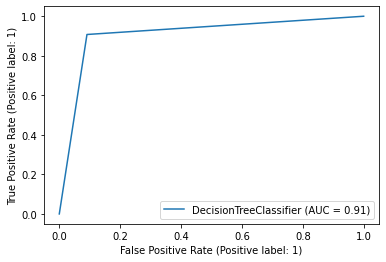

In [54]:
from sklearn.metrics import plot_roc_curve
# no depth limit
plot_roc_curve(clf, X_test, y_test)

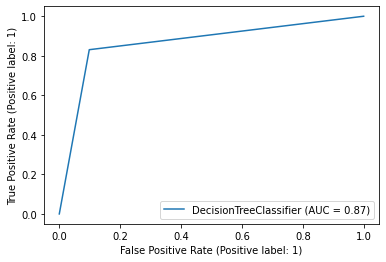

In [55]:
# depth = 1
plot_roc_curve(clf_1, X_test, y_test)

    6. A Precision/Recall curve

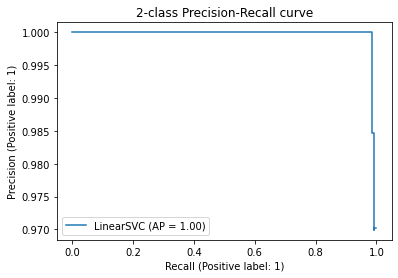

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC())
classifier.fit(X_train, y_train)
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")